Robert Miller

In [1]:
from essentia.standard import *
import glob

In [2]:
myLib = glob.glob('<some directory here>/*.wav')

In [3]:
sndFiles = []
for snd in myLib:
    loader = MonoLoader(filename=snd)
    sndFiles.append(loader())

In [4]:
w = Windowing(type='hann')
spectrum = Spectrum()
pitchYin = PitchYinFFT()

In [35]:
titles = []
for ml in myLib:
    titles.append(ml[55:])

### Pitch Histograms

In [5]:
def getPitches(audio, windowSize=2048, hop=1024):
    pitches = []
    confidences = []
    for frame in FrameGenerator(audio, frameSize=windowSize, hopSize=hop):
        pitch, pConf = pitchYin(spectrum(w(frame)))
        pitches.append(pitch)
        confidences.append(pConf)
    return pitches, confidences

In [6]:
p1, c1 = getPitches(sndFiles[0])

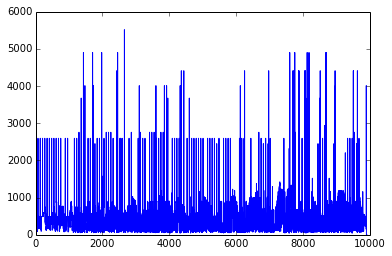

In [7]:
plot(p1)

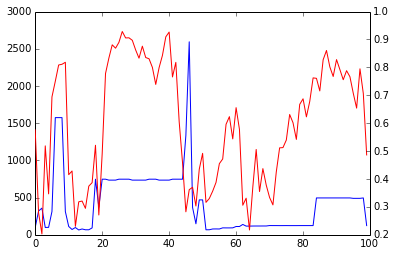

In [8]:
plot(p1[2000:2100])
twinx()
plot(c1[2000:2100],'r')

In [9]:
pitches = []
confidences = []
for snd in sndFiles:
    p,c = getPitches(snd)
    pitches.append(p)
    confidences.append(c)

In [10]:
#Code from Class
def midi2Hz(midinote, tuning=440.0):
    return tuning * (2**((midinote - 69)/12.0))

num_freqs = 8*12 # eight octaves from C0
quant_freqs = [midi2Hz(i + 24) for i in range(num_freqs)]

def quantize_freq(freq_list, quant_freqs, quant_offset=24):
    quantized = zeros_like(freq_list)
    for i in range(len(freq_list)):
        arg = argwhere(array(quant_freqs) > freq_list[i])
        if arg.size == 0 or arg[0] == 0:
            quantized[i] = 0
        elif quant_freqs[arg[0]] - freq_list[i] > freq_list[i] - quant_freqs[arg[0] - 1]:
            quantized[i] = arg[0] - 1
        else:
            quantized[i] = arg[0]
    return quantized + quant_offset

In [11]:
quantized_pitches = []
for p in pitches:
    quantized_pitches.append(quantize_freq(p,quant_freqs))

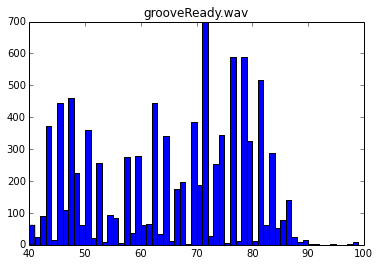

In [36]:
hist(quantized_pitches[0],arange(40,100));
title(titles[0])

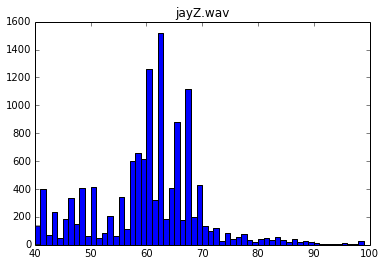

In [37]:
hist(quantized_pitches[1],arange(40,100));
title(titles[1])

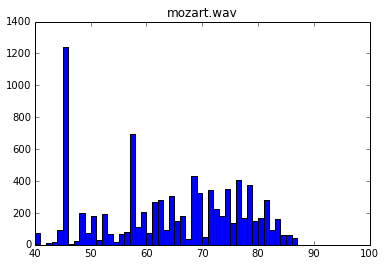

In [38]:
hist(quantized_pitches[2],arange(40,100));
title(titles[2])

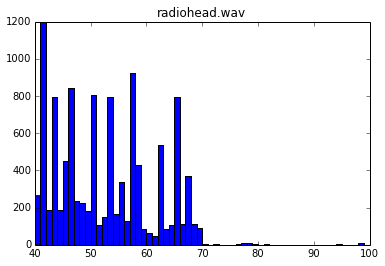

In [39]:
hist(quantized_pitches[3],arange(40,100));
title(titles[3])

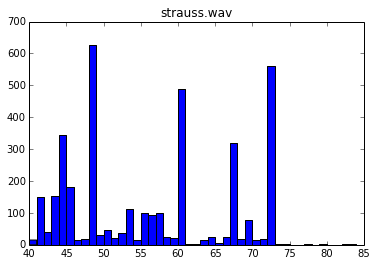

In [40]:
hist(quantized_pitches[4],arange(40,100));
title(titles[4])

### Self-Similarity Matrix

In [20]:
winSize = 200
hopSize = 100
signal = pitches[1]
win_start = arange(0,len(signal)-winSize,hopSize)
ssm = []
for starti in win_start:
    for startj in win_start:
        wini = signal[starti:starti+winSize]
        winj = signal[startj:startj+winSize]
        ssm.append(corrcoef(wini,winj)[0,1])

In [21]:
ssm = array(ssm).reshape(len(win_start), len(win_start))

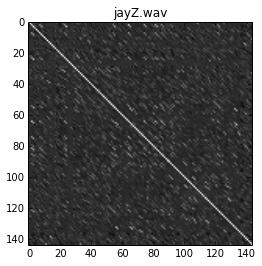

In [41]:
imshow(ssm,cmap='gray')
title(titles[1])

In [25]:
def constructSSM(sig):
    winSize = 200
    hopSize = 100
    signal = sig
    win_start = arange(0,len(signal)-winSize,hopSize)
    ssm = []
    for starti in win_start:
        for startj in win_start:
            wini = signal[starti:starti+winSize]
            winj = signal[startj:startj+winSize]
            ssm.append(corrcoef(wini,winj)[0,1])
    ssm = array(ssm).reshape(len(win_start), len(win_start))
    return ssm

In [26]:
ssms = []
for p in pitches:
    ssms.append(constructSSM(p))

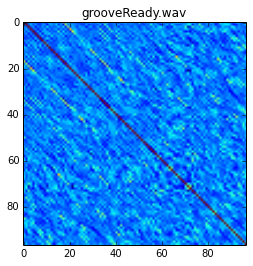

In [42]:
imshow(ssms[0])
title(titles[0])

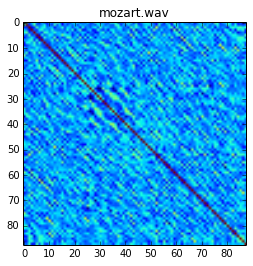

In [43]:
imshow(ssms[2])
title(titles[2])

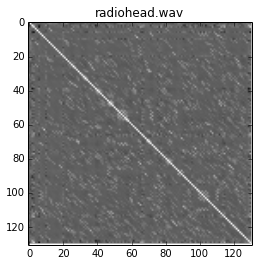

In [44]:
imshow(ssms[3],cmap='gray')
title(titles[3])

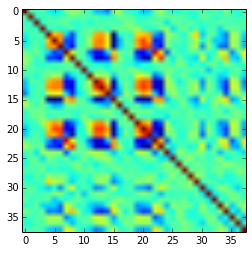

In [31]:
imshow(ssms[4])

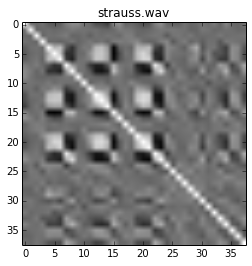

In [34]:
imshow(ssms[4],cmap='gray')
title(myLib[4][55:])